In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!gdown --id 18LgDRryekEX3KUJ_MGr-F_LuymffDRNN

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18LgDRryekEX3KUJ_MGr-F_LuymffDRNN
To: /content/ratings.csv
100% 678M/678M [00:03<00:00, 208MB/s]


In [3]:
!gdown --id 1FTtJzWbujulzODxlRFRfCDLoMOEdH5uT

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FTtJzWbujulzODxlRFRfCDLoMOEdH5uT
To: /content/movies.csv
100% 3.04M/3.04M [00:00<00:00, 267MB/s]


In [4]:
movies = pd.read_csv( 'movies.csv')

print('Number of movies (with names)：%d' % movies[~pd.isnull(movies.title)].shape[0])
print('number of movies (no title）：%d' % movies[pd.isnull(movies.title)].shape[0])
print('Number of Movies (Total)：%d' % movies.shape[0])
movies.sample(10)

Number of movies (with names)：62423
number of movies (no title）：0
Number of Movies (Total)：62423


,movieId,title,genres
16575,87430,Green Lantern (2011),Action|Adventure|Sci-Fi
15213,80358,"Theory of Everything, The (2006)",Drama
11566,52773,Kiss Me Again (2006),Drama|Romance
12764,63179,Tokyo! (2008),Drama
53816,188199,Jazzclub - Der frühe Vogel fängt den Wurm (2004),Comedy
22719,116056,Coach (2010),Comedy|Romance
8664,26220,"Violent City (Family, The) (Città violenta) (1...",Action|Crime|Drama
46279,172123,Godspeed (2016),Comedy|Crime|Drama|Thriller
53496,187539,Aniki Bóbó (1942),Children|Drama
32323,140665,84 Charlie Mopic (1989),Adventure|Drama


In [5]:
ratings = pd.read_csv('ratings.csv')
print('User data：%d' % ratings.userId.unique().shape[0])
print('Movie data：%d' % ratings.movieId.unique().shape[0])
print('Number of ratings：%d' % ratings.shape[0])
ratings.head()

User data：162541
Movie data：59047
Number of ratings：25000095


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
combine_movie_rating= pd.merge(ratings,movies,on='movieId')
combine_movie_rating=combine_movie_rating.drop(['timestamp'],axis = 1)
print(len(combine_movie_rating))
combine_movie_rating.head()

25000095


,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [7]:
combine_movie_rating = combine_movie_rating.dropna(axis = 0 ,subset=['title'])
print(len(combine_movie_rating))
combine_movie_rating.head()

25000095


,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [8]:
movie_rating_count=pd.DataFrame(combine_movie_rating.
                    groupby(['movieId'])['rating'].
                    count().
                    reset_index().
                    rename(columns={'rating':'totalRatingCount'})                   
                   )
movie_rating_count.head()

,movieId,totalRatingCount
0,1,57309
1,2,24228
2,3,11804
3,4,2523
4,5,11714


In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_rating_count['totalRatingCount'].describe())

count   59047.000
mean      423.393
std      2477.886
min         1.000
25%         2.000
50%         6.000
75%        36.000
max     81491.000
Name: totalRatingCount, dtype: float64


In [10]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_rating_count,left_on='movieId',right_on='movieId')
print(len(combine_movie_rating))
print(len(rating_with_totalRatingCount))
rating_with_totalRatingCount.head()

25000095
25000095


,userId,movieId,rating,title,genres,totalRatingCount
0,1,296,5.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672
1,3,296,5.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672
2,4,296,4.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672
3,5,296,4.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672
4,7,296,4.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672


In [11]:
#10% of the movies have more than 150 reviews
popular_threshold=150
rating_popular_movies= rating_with_totalRatingCount.query('totalRatingCount>=@popular_threshold')
rating_popular_movies.head()

,userId,movieId,rating,title,genres,totalRatingCount
0,1,296,5.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672
1,3,296,5.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672
2,4,296,4.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672
3,5,296,4.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672
4,7,296,4.000,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672


K-NN

In [12]:
ratings_pivot = rating_popular_movies.pivot(index='movieId', columns='userId',values='rating').fillna(0)
ratings_pivot_sparse = csr_matrix(ratings_pivot.values)

In [ ]:
type(ratings_pivot)

pandas.core.frame.DataFrame

In [13]:
model_nn_binary = NearestNeighbors(metric='cosine', algorithm='brute')
model_nn_binary.fit(ratings_pivot_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [14]:
query_index=np.random.choice(ratings_pivot.shape[0])
distances, indices = model_nn_binary.kneighbors(ratings_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 11)

for i in range(0, len(distances.flatten())):
    movieId=ratings_pivot.index[query_index]
    likelymovieId=ratings_pivot.index[indices.flatten()[i]]
    if i == 0:
        print('current movie:',movies[movies.movieId==movieId]['title'].values[0])
    else:
        print('Recommended Movies{0}: {1}, Correlation coefficient:{2}'.format(i, movies[movies.movieId==likelymovieId]['title'].values[0], 
                                                    distances.flatten()[i]))

current movie: Internal Affairs (1990)
Recommended Movies1: Final Analysis (1992), Correlation coefficient:0.723325579843936
Recommended Movies2: Bad Influence (1990), Correlation coefficient:0.7315591390611367
Recommended Movies3: Presumed Innocent (1990), Correlation coefficient:0.7504022083935238
Recommended Movies4: Bugsy (1991), Correlation coefficient:0.7512228376390364
Recommended Movies5: Class Action (1991), Correlation coefficient:0.7565679729231175
Recommended Movies6: Tightrope (1984), Correlation coefficient:0.7588939746813204
Recommended Movies7: Shattered (1991), Correlation coefficient:0.7663057455956711
Recommended Movies8: Sea of Love (1989), Correlation coefficient:0.767801123340933
Recommended Movies9: Year of the Dragon (1985), Correlation coefficient:0.7712053798205727
Recommended Movies10: Body Double (1984), Correlation coefficient:0.7762870397200795


In [15]:
movieId=5816
distances, indices = model_nn_binary.kneighbors(ratings_pivot.query('movieId ==' + str(movieId)).values, n_neighbors = 11)

for i in range(0, len(distances.flatten())):
    likelymovieId=ratings_pivot.index[indices.flatten()[i]]
    if i == 0:
        print('current movie:',movies[movies.movieId==movieId]['title'].values[0])
    else:
        print('Recommended Movies{0}: {1}, Correlation coefficient:{2}'.format(i, movies[movies.movieId==likelymovieId]['title'].values[0], 
                                                    distances.flatten()[i]))

current movie: Harry Potter and the Chamber of Secrets (2002)
Recommended Movies1: Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001), Correlation coefficient:0.2373601318581796
Recommended Movies2: Harry Potter and the Prisoner of Azkaban (2004), Correlation coefficient:0.2622594783140192
Recommended Movies3: Harry Potter and the Goblet of Fire (2005), Correlation coefficient:0.31897598315939657
Recommended Movies4: Harry Potter and the Order of the Phoenix (2007), Correlation coefficient:0.36205738835067103
Recommended Movies5: Harry Potter and the Half-Blood Prince (2009), Correlation coefficient:0.43122100655032936
Recommended Movies6: Pirates of the Caribbean: The Curse of the Black Pearl (2003), Correlation coefficient:0.45567817667166644
Recommended Movies7: Harry Potter and the Deathly Hallows: Part 1 (2010), Correlation coefficient:0.4638087954819219
Recommended Movies8: Harry Potter and the Deathly Hallows: Part 2 (2011), Correlatio

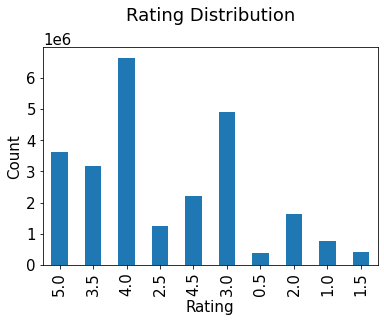

In [ ]:
plt.rc("font", size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

SVD


In [12]:
ratings_pivot2 = rating_popular_movies.pivot(index='userId', columns='movieId',values='rating').fillna(0)
ratings_pivot2_sparse = csr_matrix(ratings_pivot2.values)
print(ratings_pivot2.shape)
ratings_pivot2.head()

(162540, 8916)


movieId,1,2,3,4,5,6,7,8,9,10,...,202103,202393,202429,202439,203222,203519,204352,204542,204698,205383
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,2.500,0.000,0.000,0.000,0.000
5,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [13]:
X=ratings_pivot2.values.T
X.shape

(8916, 162540)

In [14]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=10,random_state=17)
matrix=svd.fit_transform(X)
print(matrix.shape)

(8916, 10)


In [15]:
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
corr=np.corrcoef(matrix)
print(corr.shape)
corr

(8916, 8916)


array([[1.        , 0.8665842 , 0.71450345, ..., 0.39751429, 0.3545334 ,
        0.32172097],
       [0.8665842 , 1.        , 0.70505741, ..., 0.4562236 , 0.35594061,
        0.36473392],
       [0.71450345, 0.70505741, 1.        , ..., 0.17700552, 0.08292502,
        0.11322767],
       ...,
       [0.39751429, 0.4562236 , 0.17700552, ..., 1.        , 0.95424441,
        0.94118689],
       [0.3545334 , 0.35594061, 0.08292502, ..., 0.95424441, 1.        ,
        0.98554706],
       [0.32172097, 0.36473392, 0.11322767, ..., 0.94118689, 0.98554706,
        1.        ]])

In [16]:
example_movieId=88125
movieIds=ratings_pivot2.columns 
movieIds_list = list(movieIds)
movieId_index = movieIds_list.index(example_movieId)

movieId_vec=corr[movieId_index]
argsort_idx =np.argsort(-movieId_vec)[:11]
coff=movieId_vec[argsort_idx]
similar_movie_Ids=movieIds[argsort_idx]
print(similar_movie_Ids.values)
print('--------------------------------------------------------------')
print(coff)

[ 88125  81834  76093  69844  79091 106696  81847  95167  98491 112175
 103141]
--------------------------------------------------------------
[1.         0.9988542  0.99530681 0.9950529  0.99391705 0.9912279
 0.99047486 0.98987166 0.9845514  0.98047001 0.9785716 ]


In [18]:
for idx,mId in enumerate(similar_movie_Ids):
    name = movies[movies.movieId==mId]['title'].values[0]
    if idx==0:
        print('current movie:',name)
    else:
         print('Recommended Movies {0}: {1}, Correlation coefficient:{2}'.format(idx,name, coff[idx]))

current movie: Harry Potter and the Deathly Hallows: Part 2 (2011)
Recommended Movies 1: Harry Potter and the Deathly Hallows: Part 1 (2010), Correlation coefficient:0.9988541985657433
Recommended Movies 2: How to Train Your Dragon (2010), Correlation coefficient:0.9953068116318762
Recommended Movies 3: Harry Potter and the Half-Blood Prince (2009), Correlation coefficient:0.9950529039040458
Recommended Movies 4: Despicable Me (2010), Correlation coefficient:0.9939170531395135
Recommended Movies 5: Frozen (2013), Correlation coefficient:0.9912278957305113
Recommended Movies 6: Tangled (2010), Correlation coefficient:0.9904748578111608
Recommended Movies 7: Brave (2012), Correlation coefficient:0.9898716592597403
Recommended Movies 8: Paperman (2012), Correlation coefficient:0.9845513997531897
Recommended Movies 9: How to Train Your Dragon 2 (2014), Correlation coefficient:0.9804700103304826
Recommended Movies 10: Monsters University (2013), Correlation coefficient:0.9785716034553854
